# Introduction

This workbook contains some examples for reading, analysing and plotting processed MT data. It covers most of the steps available in MTPy. For more details on specific input parameters and other functionality, we recommend looking at the mtpy documentation, which can be found at: https://mtpy2.readthedocs.io/en/develop/.

This workbook is structured according to some of the key modules in MTPy: Core, Analysis, Imaging, and Modeling.

## Getting Started

To start with, you will need to make sure MTPy is installed and is working correctly. Please see the installation guide (https://github.com/MTgeophysics/mtpy/wiki/MTPy-installation-guide-for-Windows-10-and-Ubuntu-18.04) for details.

Before you begin these examples, we suggest you make a temporary folder (e.g. C:/tmp) to save all example outputs.

## Useful tricks and tips

This workbook exists as a Jupyter notebook and a pdf. If you are running the Jupyter notebook, you can run each of the cells, modifying the inputs to suit your requirements. Most of these examples have been written to be self contained.

In Jupyter, you can add the following line to the top of any cell and it will write the contents of that cell to a python script: %%writefile example.py

You can also select multiple cells and copy them to a new Jupyter notebook.

Many of the examples below make use of the matplotlib colour maps. Please see https://matplotlib.org/examples/color/colormaps_reference.html for colour map options.

# Core

These first few examples cover some of the basic functions and tools that can be used to look at data contained in an edi file, plot it, and make changes (e.g. sample onto different frequencies).

## Read an edi file into an MT object

In [1]:
# import required modules
from mtpy.core.mt import MT

# Define the path to your edi file
edi_file = "C:/mtpywin/mtpy/examples/data/edi_files_2/Synth00.edi"

# Create an MT object
mt_obj = MT(edi_file)

The mt_obj contains all the data from the edi file, e.g. impedance, tipper, frequency as well as station information (lat/long). To look at any of these parameters you can type, for example:

In [3]:
# To see the latitude and longitude
print(mt_obj.lat, mt_obj.lon)

-19.01 136.01


In [4]:
# To see the easting, northing, and elevation
print(mt_obj.east, mt_obj.north, mt_obj.elev)

606300.4060199939 7897760.860594714 95.0


There are many other parameters you can look at in the mt_obj. Just type mt_obj.[TAB] to see what is available.
In the MT object are the Z and Tipper objects (mt_obj.Z; mt_obj.Tipper). These contain all information related to, respectively, the impedance tensor and the tipper.

In [5]:
# for example, to see the frequency values represented in the impedance tensor:
print(mt_obj.Z.freq)

[1.256500e+04 9.751601e+03 7.876300e+03 6.188500e+03 5.250801e+03
 4.265799e+03 3.515799e+03 8.437800e+02 6.562798e+02 4.922399e+02
 3.867599e+02 3.164400e+02 2.578400e+02 2.109600e+02 1.728900e+02
 1.367200e+02 1.015600e+02 7.421900e+01 5.761700e+01 4.882800e+01
 4.101600e+01 3.222700e+01 2.636700e+01 2.148400e+01 1.757800e+01
 1.440400e+01 1.147500e+01 8.593800e+00 6.591801e+00 5.371100e+00
 4.394500e+00 3.601100e+00 2.868700e+00 2.304700e+00 1.914100e+00
 1.601600e+00 1.328100e+00 1.074200e+00 8.789100e-01 6.835900e-01
 5.078100e-01 3.710900e-01 2.880900e-01 2.050800e-01 1.318400e-01
 8.789098e-02 6.835900e-02 5.127000e-02 4.028299e-02 3.295900e-02
 2.685500e-02 2.197300e-02 1.709000e-02 1.281700e-02 1.007100e-02
 8.239700e-03 6.713900e-03 5.493201e-03 4.272499e-03 2.822900e-03
 2.059900e-03 1.678500e-03 1.373300e-03 1.068100e-03 7.629400e-04]


In [6]:
# or to see the impedance tensor (first 4 elements)
print(mt_obj.Z.z[:4])

[[[  26.58566   -4.302123j  482.4492  +604.7747j  ]
  [-410.0502  -800.4257j      8.994784 +44.07396j ]]

 [[  12.43271   +7.519158j  434.8246  +514.6176j  ]
  [-372.7205  -666.402j      17.64062  +36.09528j ]]

 [[   7.652151  +6.28703j   398.3996  +460.0998j  ]
  [-349.9875  -580.3959j     21.57495  +33.98854j ]]

 [[   3.59474   +1.225811j  362.5121  +413.2823j  ]
  [-328.0029  -501.5329j     25.02421  +33.02813j ]]]


In [7]:
# or the resistivity or phase (first 4 values)
print(mt_obj.Z.resistivity[:4])
print(mt_obj.Z.phase[:4])

[[[1.15448560e-02 9.52661629e+00]
  [1.28742136e+01 3.22072438e-02]]

 [[4.32975088e-03 9.30931663e+00]
  [1.19572611e+01 3.31035019e-02]]

 [[2.49056438e-03 9.40578869e+00]
  [1.16641228e+01 4.11538240e-02]]

 [[4.66179794e-04 9.76706091e+00]
  [1.16060807e+01 5.54922342e-02]]]
[[[  -9.19198953   51.41945343]
  [-117.1256163    78.46525668]]

 [[  31.16505948   49.80396162]
  [-119.21840697   63.95414249]]

 [[  39.40662667   49.11076951]
  [-121.09061209   57.59379146]]

 [[  18.82944281   48.74426019]
  [-123.18471678   52.85011776]]]


As with the MT object, you can explore the object by typing mt_obj.Z.[TAB] to see the available attributes.

## Plot an edi file

In this example we plot MT data from an edi file.

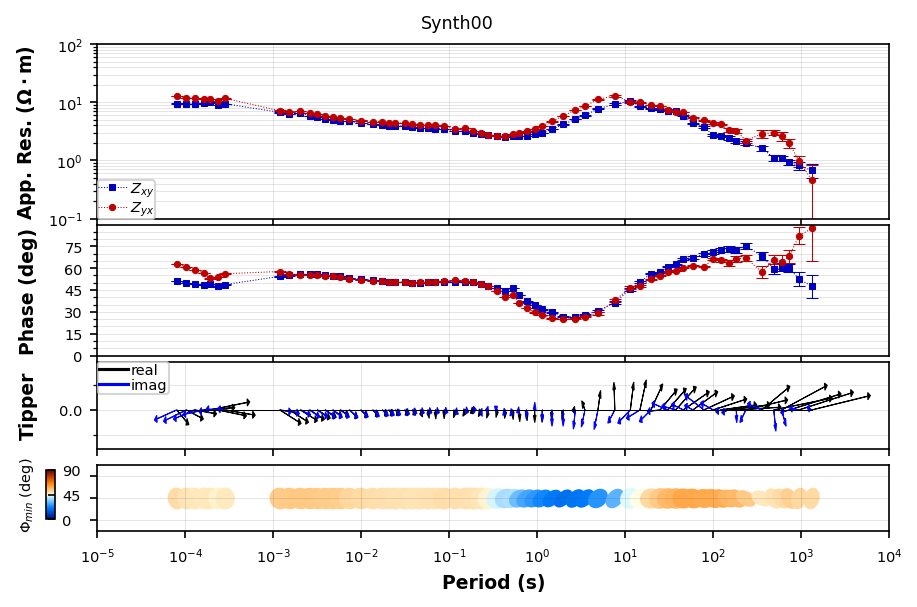

In [9]:
# import required modules
from mtpy.core.mt import MT
import os

# Define the path to your edi file and save path
edi_file = "C:/mtpywin/mtpy/examples/data/edi_files_2/Synth00.edi"
savepath = r"C:/tmp"

# Create an MT object
mt_obj = MT(edi_file)

# To plot the edi file we read in in Part 1 & save to file:
pt_obj = mt_obj.plot_mt_response(plot_num=1, # 1 = yx and xy; 2 = all 4 components
                                            # 3 = off diagonal + determinant
                                 plot_tipper = 'yri',
                                 plot_pt = 'y' # plot phase tensor 'y' or 'n'
                                )
#pt_obj.save_plot(os.path.join(savepath,"Synth00.png"), fig_dpi=400)

## Make some change to the data and save to a new file

This example demonstrates how to resample the data onto new frequency values and write to a new edi file. In the example below, you can either choose every second frequency or resample onto five periods per decade. 
To do this we need to make a new Z object, and save it to a file.

In [10]:
# import required modules
from mtpy.core.mt import MT
import os

# Define the path to your edi file and save path
edi_file = r"C:/mtpywin/mtpy/examples/data/edi_files_2/Synth00.edi"
savepath = r"C:/tmp"

# Create an MT object
mt_obj = MT(edi_file)

# First, define a frequency array:
# Every second frequency:
new_freq_list = mt_obj.Z.freq[::2] 

# OR 5 periods per decade from 10^-4 to 10^3 seconds
from mtpy.utils.calculator import get_period_list
new_freq_list = 1./get_period_list(1e-4,1e3,5)

# Create new Z and Tipper objects containing interpolated data
new_Z_obj, new_Tipper_obj = mt_obj.interpolate(new_freq_list)

# Write a new edi file using the new data
mt_obj.write_mt_file(
            save_dir=savepath, 
            fn_basename='Synth00_5ppd', 
            file_type='edi',
            new_Z_obj=new_Z_obj, # provide a z object to update the data
            new_Tipper_obj=new_Tipper_obj, # provide a tipper object
            longitude_format='LONG', # write longitudes as 'LONG' not ‘LON’
            latlon_format='dd'# write as decimal degrees (any other input
                              # will write as degrees:minutes:seconds
            )

C:\mtpywin\mtpy\mtpy\utils\calculator.py:365: RuntimeWarning: invalid value encountered in double_scalars
  z_rel_err = error/z_amp


'C:\\tmp\\Synth00_5ppd.edi'